In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import fashion_mnist

import matplotlib.pyplot as plt

In [2]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [3]:
print('Train shape', train_images.shape)
print('Test shape', test_images.shape)

Train shape (60000, 28, 28)
Test shape (10000, 28, 28)


In [4]:
# Нормализация
train_images = (train_images / 127) - 1
test_images = (test_images / 127) - 1

# Сглаживание
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [5]:
# Строим модель
model_fm = Sequential()
model_fm.add(Dense(128, activation='relu', input_shape=(784,)))
model_fm.add(Dense(64, activation='relu'))
model_fm.add(Dense(10, activation='softmax'))

In [6]:
# Компиляция модели
model_fm.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [7]:
model_fm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Строим модель
model_fm2 = Sequential()
model_fm2.add(Dense(128, activation='relu', input_shape=(784,)))
model_fm2.add(Dense(64, activation='relu'))
model_fm2.add(Dense(32, activation='relu'))
model_fm2.add(Dense(10, activation='softmax'))

In [9]:
# Компиляция модели
model_fm2.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [10]:
model_fm2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [11]:
hist_accuracy1 = []
for i in [5, 15, 25]:
    
    hist = model_fm.fit(
        train_images,
        to_categorical(train_labels),
        epochs=i,
        batch_size=32, validation_split=0.2
    )    
    model_fm.evaluate(
        test_images,
        to_categorical(test_labels)
    )
    
        
    hist2 = model_fm2.fit(
        train_images,
        to_categorical(train_labels),
        epochs=i,
        batch_size=32, validation_split=0.2
    )    
    model_fm2.evaluate(
        test_images,
        to_categorical(test_labels)
    )
    
    hist_accuracy1.append(hist.history['accuracy'])
    hist_accuracy1.append(hist2.history['accuracy'])


Epoch 1/5
1500/1500 [==============================] - 1s 893us/step - loss: 0.4963 - accuracy: 0.8197 - val_loss: 0.4278 - val_accuracy: 0.8443
Epoch 2/5
1500/1500 [==============================] - 1s 834us/step - loss: 0.3810 - accuracy: 0.8579 - val_loss: 0.4049 - val_accuracy: 0.8513
Epoch 3/5
1500/1500 [==============================] - 1s 825us/step - loss: 0.3443 - accuracy: 0.8723 - val_loss: 0.3731 - val_accuracy: 0.8658
Epoch 4/5
1500/1500 [==============================] - 1s 822us/step - loss: 0.3211 - accuracy: 0.8798 - val_loss: 0.3578 - val_accuracy: 0.8713
Epoch 5/5
313/313 [==============================] - 0s 665us/step - loss: 0.3830 - accuracy: 0.8617
Epoch 1/5
1500/1500 [==============================] - 1s 913us/step - loss: 0.5092 - accuracy: 0.8155 - val_loss: 0.4097 - val_accuracy: 0.8489
Epoch 2/5
1500/1500 [==============================] - 1s 852us/step - loss: 0.3904 - accuracy: 0.8554 - val_loss: 0.4244 - val_accuracy: 0.8410
Epoch 3/5
1500/1500 [========

Epoch 13/25
1500/1500 [==============================] - 1s 857us/step - loss: 0.1208 - accuracy: 0.9547 - val_loss: 0.4440 - val_accuracy: 0.8852
Epoch 14/25
1500/1500 [==============================] - 1s 875us/step - loss: 0.1181 - accuracy: 0.9563 - val_loss: 0.4820 - val_accuracy: 0.8873
Epoch 15/25
1500/1500 [==============================] - 1s 867us/step - loss: 0.1176 - accuracy: 0.9559 - val_loss: 0.5085 - val_accuracy: 0.8841
Epoch 16/25
1500/1500 [==============================] - 1s 857us/step - loss: 0.1136 - accuracy: 0.9574 - val_loss: 0.4921 - val_accuracy: 0.8861
Epoch 17/25
1500/1500 [==============================] - 1s 830us/step - loss: 0.1094 - accuracy: 0.9587 - val_loss: 0.5206 - val_accuracy: 0.8804
Epoch 18/25
1500/1500 [==============================] - 1s 840us/step - loss: 0.1090 - accuracy: 0.9587 - val_loss: 0.5116 - val_accuracy: 0.8748
Epoch 19/25
1500/1500 [==============================] - 1s 846us/step - loss: 0.1020 - accuracy: 0.9614 - val_loss: 0

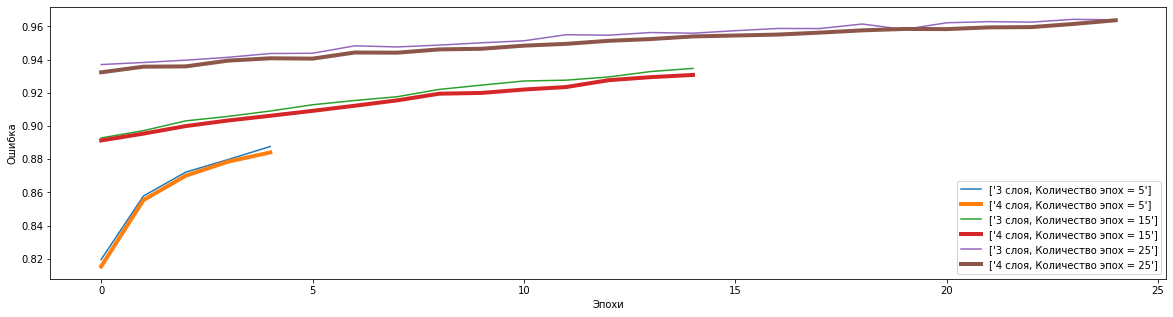

In [12]:
x11 = hist_accuracy1[0]
x21 = hist_accuracy1[1]
x12 = hist_accuracy1[2]
x22 = hist_accuracy1[3]
x13 = hist_accuracy1[4]
x23 = hist_accuracy1[5]
plt.figure(figsize=(20, 5))

plt.plot(x11, label=['3 слоя, Количество эпох = 5'])
plt.plot(x21, label=['4 слоя, Количество эпох = 5'], linewidth=4)
plt.plot(x12, label=['3 слоя, Количество эпох = 15'])
plt.plot(x22, label=['4 слоя, Количество эпох = 15'], linewidth=4)
plt.plot(x13, label=['3 слоя, Количество эпох = 25'])
plt.plot(x23, label=['4 слоя, Количество эпох = 25'], linewidth=4)
plt.xlabel('Эпохи')
plt.ylabel('Ошибка')
plt.legend(loc="best")
plt.show()

In [13]:
hist_accuracy2 = []
hist2_accuracy2 = []
for i in [16, 24, 32, 40, 48]:
    
    hist = model_fm.fit(
        train_images,
        to_categorical(train_labels),
        epochs=5,
        batch_size=i, validation_split=0.2
    )    
    model_fm.evaluate(
        test_images,
        to_categorical(test_labels)
    )
    hist2 = model_fm2.fit(
        train_images,
        to_categorical(train_labels),
        epochs=5,
        batch_size=i, validation_split=0.2
    )    
    model_fm.evaluate(
        test_images,
        to_categorical(test_labels)
    )
    
    hist_accuracy2.append(hist.history['accuracy'])
    hist2_accuracy2.append(hist2.history['accuracy'])


Epoch 1/5
3000/3000 [==============================] - 3s 1ms/step - loss: 0.1482 - accuracy: 0.9454 - val_loss: 0.5616 - val_accuracy: 0.8756
Epoch 2/5
3000/3000 [==============================] - 3s 1ms/step - loss: 0.1319 - accuracy: 0.9516 - val_loss: 0.5574 - val_accuracy: 0.8781
Epoch 3/5
3000/3000 [==============================] - 3s 1ms/step - loss: 0.1277 - accuracy: 0.9530 - val_loss: 0.5588 - val_accuracy: 0.8815
Epoch 4/5
3000/3000 [==============================] - 3s 1ms/step - loss: 0.1252 - accuracy: 0.9539 - val_loss: 0.5359 - val_accuracy: 0.8823
Epoch 5/5
313/313 [==============================] - 0s 642us/step - loss: 0.6420 - accuracy: 0.8712
Epoch 1/5
3000/3000 [==============================] - 3s 1ms/step - loss: 0.1551 - accuracy: 0.9436 - val_loss: 0.4939 - val_accuracy: 0.8806
Epoch 2/5
3000/3000 [==============================] - 3s 1ms/step - loss: 0.1405 - accuracy: 0.9490 - val_loss: 0.5177 - val_accuracy: 0.8810
Epoch 3/5
3000/3000 [====================

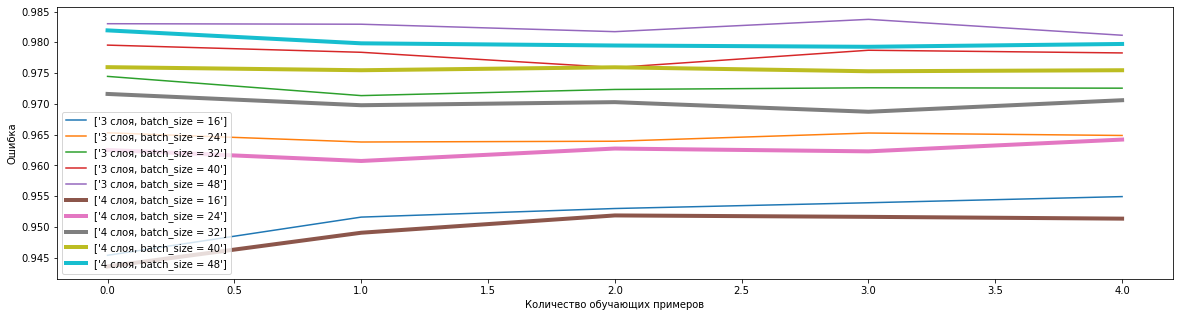

In [14]:
x1 = hist_accuracy2[0]
x2 = hist_accuracy2[1]
x3 = hist_accuracy2[2]
x4 = hist_accuracy2[3]
x5 = hist_accuracy2[4]
x21 = hist2_accuracy2[0]
x22 = hist2_accuracy2[1]
x23 = hist2_accuracy2[2]
x24 = hist2_accuracy2[3]
x25 = hist2_accuracy2[4]
plt.figure(figsize=(20, 5))

plt.plot(x1, label=['3 слоя, batch_size = 16'])
plt.plot(x2, label=['3 слоя, batch_size = 24'])
plt.plot(x3, label=['3 слоя, batch_size = 32'])
plt.plot(x4, label=['3 слоя, batch_size = 40'])
plt.plot(x5, label=['3 слоя, batch_size = 48'])
plt.plot(x21, label=['4 слоя, batch_size = 16'], linewidth=4)
plt.plot(x22, label=['4 слоя, batch_size = 24'], linewidth=4)
plt.plot(x23, label=['4 слоя, batch_size = 32'], linewidth=4)
plt.plot(x24, label=['4 слоя, batch_size = 40'], linewidth=4)
plt.plot(x25, label=['4 слоя, batch_size = 48'], linewidth=4)
plt.xlabel('Количество обучающих примеров')
plt.ylabel('Ошибка')
plt.legend(loc="best")
plt.show()

In [15]:
# Строим модель
model_fm = Sequential()
model_fm.add(Dense(128, activation='tanh', input_shape=(784,)))
model_fm.add(Dense(64, activation='tanh'))
model_fm.add(Dense(10, activation='softmax'))

In [16]:
# Компиляция модели
model_fm.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [17]:
model_fm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Строим модель
model_fm2 = Sequential()
model_fm2.add(Dense(128, activation='tanh', input_shape=(784,)))
model_fm2.add(Dense(64, activation='tanh'))
model_fm2.add(Dense(32, activation='tanh'))
model_fm2.add(Dense(10, activation='softmax'))

In [19]:
# Компиляция модели
model_fm2.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [20]:
model_fm2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [21]:
hist_accuracy3 = []
for i in [5, 15, 25]:
    
    hist = model_fm.fit(
        train_images,
        to_categorical(train_labels),
        epochs=i,
        batch_size=32, validation_split=0.2
    )    
    model_fm.evaluate(
        test_images,
        to_categorical(test_labels)
    )
    
        
    hist2 = model_fm2.fit(
        train_images,
        to_categorical(train_labels),
        epochs=i,
        batch_size=32, validation_split=0.2
    )    
    model_fm2.evaluate(
        test_images,
        to_categorical(test_labels)
    )
    
    hist_accuracy3.append(hist.history['accuracy'])
    hist_accuracy3.append(hist2.history['accuracy'])


Epoch 1/5
1500/1500 [==============================] - 1s 896us/step - loss: 0.4961 - accuracy: 0.8192 - val_loss: 0.4106 - val_accuracy: 0.8517
Epoch 2/5
1500/1500 [==============================] - 1s 847us/step - loss: 0.3927 - accuracy: 0.8574 - val_loss: 0.3868 - val_accuracy: 0.8616
Epoch 3/5
1500/1500 [==============================] - 1s 844us/step - loss: 0.3656 - accuracy: 0.8664 - val_loss: 0.3914 - val_accuracy: 0.8574
Epoch 4/5
1500/1500 [==============================] - 1s 837us/step - loss: 0.3491 - accuracy: 0.8723 - val_loss: 0.3644 - val_accuracy: 0.8690
Epoch 5/5
313/313 [==============================] - 0s 684us/step - loss: 0.3988 - accuracy: 0.8569
Epoch 1/5
1500/1500 [==============================] - 1s 913us/step - loss: 0.5281 - accuracy: 0.8143 - val_loss: 0.4517 - val_accuracy: 0.8372
Epoch 2/5
1500/1500 [==============================] - 1s 868us/step - loss: 0.4106 - accuracy: 0.8508 - val_loss: 0.4257 - val_accuracy: 0.8435
Epoch 3/5
1500/1500 [========

1500/1500 [==============================] - 1s 859us/step - loss: 0.2117 - accuracy: 0.9218 - val_loss: 0.3604 - val_accuracy: 0.8773
Epoch 12/25
1500/1500 [==============================] - 1s 855us/step - loss: 0.2014 - accuracy: 0.9262 - val_loss: 0.3601 - val_accuracy: 0.8768
Epoch 13/25
1500/1500 [==============================] - 1s 848us/step - loss: 0.2019 - accuracy: 0.9256 - val_loss: 0.3732 - val_accuracy: 0.8748
Epoch 14/25
1500/1500 [==============================] - 1s 866us/step - loss: 0.1909 - accuracy: 0.9289 - val_loss: 0.3538 - val_accuracy: 0.8791
Epoch 15/25
1500/1500 [==============================] - 1s 853us/step - loss: 0.1951 - accuracy: 0.9281 - val_loss: 0.3613 - val_accuracy: 0.8792
Epoch 16/25
1500/1500 [==============================] - 1s 845us/step - loss: 0.1916 - accuracy: 0.9285 - val_loss: 0.3975 - val_accuracy: 0.8694
Epoch 17/25
1500/1500 [==============================] - 1s 849us/step - loss: 0.1915 - accuracy: 0.9294 - val_loss: 0.3728 - val_

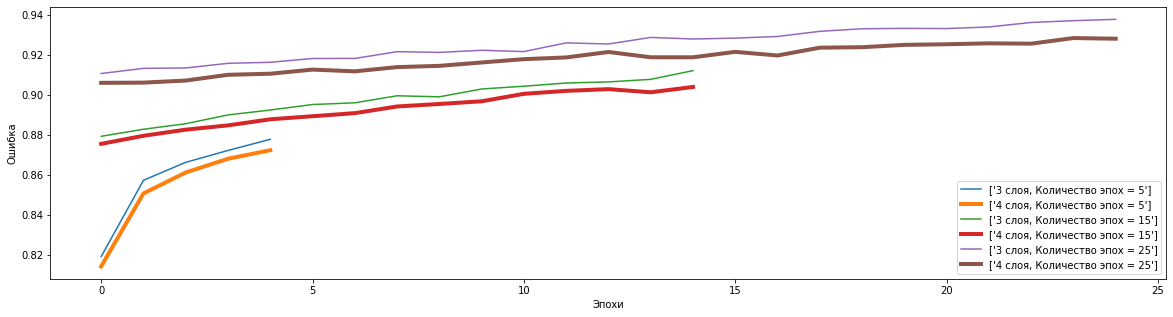

In [22]:
x11 = hist_accuracy3[0]
x21 = hist_accuracy3[1]
x12 = hist_accuracy3[2]
x22 = hist_accuracy3[3]
x13 = hist_accuracy3[4]
x23 = hist_accuracy3[5]
plt.figure(figsize=(20, 5))

plt.plot(x11, label=['3 слоя, Количество эпох = 5'])
plt.plot(x21, label=['4 слоя, Количество эпох = 5'], linewidth=4)
plt.plot(x12, label=['3 слоя, Количество эпох = 15'])
plt.plot(x22, label=['4 слоя, Количество эпох = 15'], linewidth=4)
plt.plot(x13, label=['3 слоя, Количество эпох = 25'])
plt.plot(x23, label=['4 слоя, Количество эпох = 25'], linewidth=4)
plt.xlabel('Эпохи')
plt.ylabel('Ошибка')
plt.legend(loc="best")
plt.show()

In [ ]:
hist_accuracy4 = []
hist2_accuracy4 = []
for i in [16, 24, 32, 40, 48]:
    
    hist = model_fm.fit(
        train_images,
        to_categorical(train_labels),
        epochs=5,
        batch_size=i, validation_split=0.2
    )    
    model_fm.evaluate(
        test_images,
        to_categorical(test_labels)
    )
    hist2 = model_fm2.fit(
        train_images,
        to_categorical(train_labels),
        epochs=5,
        batch_size=i, validation_split=0.2
    )    
    model_fm.evaluate(
        test_images,
        to_categorical(test_labels)
    )
    
    hist_accuracy4.append(hist.history['accuracy'])
    hist2_accuracy4.append(hist2.history['accuracy'])


Epoch 1/5
3000/3000 [==============================] - 3s 1ms/step - loss: 0.2277 - accuracy: 0.9153 - val_loss: 0.3944 - val_accuracy: 0.8669
Epoch 2/5
3000/3000 [==============================] - 3s 1ms/step - loss: 0.2223 - accuracy: 0.9171 - val_loss: 0.3892 - val_accuracy: 0.8687
Epoch 3/5
3000/3000 [==============================] - 3s 1ms/step - loss: 0.2161 - accuracy: 0.9199 - val_loss: 0.3997 - val_accuracy: 0.8652
Epoch 4/5
3000/3000 [==============================] - 3s 1ms/step - loss: 0.2114 - accuracy: 0.9212 - val_loss: 0.3983 - val_accuracy: 0.8674
Epoch 5/5
313/313 [==============================] - 0s 652us/step - loss: 0.4151 - accuracy: 0.8635
Epoch 1/5
3000/3000 [==============================] - 3s 1ms/step - loss: 0.2574 - accuracy: 0.9056 - val_loss: 0.3817 - val_accuracy: 0.8703
Epoch 2/5
3000/3000 [==============================] - 3s 1ms/step - loss: 0.2443 - accuracy: 0.9103 - val_loss: 0.4120 - val_accuracy: 0.8662
Epoch 3/5
3000/3000 [====================

In [ ]:
x1 = hist_accuracy4[0]
x2 = hist_accuracy4[1]
x3 = hist_accuracy4[2]
x4 = hist_accuracy4[3]
x5 = hist_accuracy4[4]
x21 = hist2_accuracy4[0]
x22 = hist2_accuracy4[1]
x23 = hist2_accuracy4[2]
x24 = hist2_accuracy4[3]
x25 = hist2_accuracy4[4]
plt.figure(figsize=(20, 5))

plt.plot(x1, label=['3 слоя, batch_size = 16'])
plt.plot(x2, label=['3 слоя, batch_size = 24'])
plt.plot(x3, label=['3 слоя, batch_size = 32'])
plt.plot(x4, label=['3 слоя, batch_size = 40'])
plt.plot(x5, label=['3 слоя, batch_size = 48'])
plt.plot(x21, label=['4 слоя, batch_size = 16'], linewidth=4)
plt.plot(x22, label=['4 слоя, batch_size = 24'], linewidth=4)
plt.plot(x23, label=['4 слоя, batch_size = 32'], linewidth=4)
plt.plot(x24, label=['4 слоя, batch_size = 40'], linewidth=4)
plt.plot(x25, label=['4 слоя, batch_size = 48'], linewidth=4)
plt.xlabel('Количество обучающих примеров')
plt.ylabel('Ошибка')
plt.legend(loc="best")
plt.show()

In [ ]:
x1 = hist_accuracy2[4]
x2 = hist_accuracy1[4]
x3 = hist_accuracy4[4]
x4 = hist_accuracy3[4]

plt.figure(figsize=(20, 5))

plt.plot(x5, label=['relu, 3 слоя, batch_size = 48'])
plt.plot(x13, label=['relu, 3 слоя, Количество эпох = 25'])
plt.plot(x5, label=['tanh, 3 слоя, batch_size = 48'])
plt.plot(x13, label=['tanh, 3 слоя, Количество эпох = 25'])
plt.xlabel('Количество обучающих примеров')
plt.ylabel('Ошибка')
plt.legend(loc="best")
plt.show()